In [3]:
%pip install nltk
%pip install matplotlib
%pip install numpy
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import numpy as np
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer



(10 pts) Perform Vader Sentiment Analysis on the book.

Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost*. http://www.nltk.org/howto/sentiment.htmlLinks

to an external site. . This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then 

once your code works as expected, expand it to the whole book and let it run.

(3 pts) Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not.


In [30]:
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

I do not have a particular reason for using stemming as opposed to lemmitazation, I know lemmitazation is better.

["('and',)", "('i',)", "('of',)", "('heaven',)", "('to',)", "('the',)", "('thou',)", "('thi',)", "('thee',)", "('thus',)", "('god',)", "('in',)", "('with',)", "('shall',)", "('yet',)", "('earth',)", "('but',)", "('though',)", "('us',)", "('his',)"]


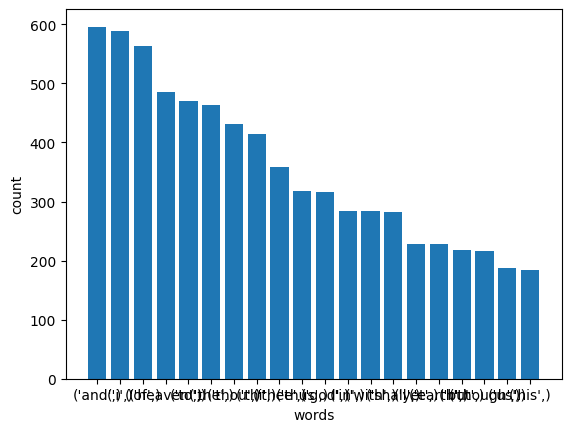

In [39]:
def nltk_corpus_word_stats(TEXT: str)-> list: # how do you type hint a graph?
    """Takes a text from the gutenberg library and finds the top 20 most common, non-stop word, stems"""

    altered_logic=[]
    stop = set(nltk.corpus.stopwords.words('english'))
    corpus = nltk.corpus.gutenberg.sents(TEXT)
    cleaned_corpus=[]

    for words in corpus:
  
        cleaned_corpus.append([x for x in words if x.isalnum() and x not in stop and x not in altered_logic]) #can't make it lowercase
                                        #i dont know why it refuses to be lowercase, but if just says that .lower() cant be used
    stemmer = SnowballStemmer('english')
    stems = []

    for x in cleaned_corpus:
        for i in x:
            stems.append(stemmer.stem(i))

    value_counts = pd.DataFrame(stems).value_counts()
    value_dict = [str(x) for x in dict(value_counts)]

    words_list = [] # yes the words have a bunch of formatting attached to them, I tried to clean it but there is some type error
    for x in value_dict:# and it hasnt worked after like 40 minutes of trying, so im leaving it like that
        words_list.append(x)

    print(words_list[:20])
    plt.bar(words_list[:20],value_counts[:20])
    plt.xlabel("words")
    plt.ylabel("count")

    
nltk_corpus_word_stats('milton-paradise.txt')



In [96]:
def nltk_corpus_sentiment_analyser(TEXT:str) ->pd.DataFrame:
    """finds the 5 most positive, negative, and neutral sentences from a gutenberg text"""
    corpus = nltk.corpus.gutenberg.sents('milton-paradise.txt')
    analyzer = SentimentIntensityAnalyzer()
    sentiments = []


    for x in corpus:
        corpus_string = ''
        for i in x:
            corpus_string = corpus_string + ' '+i

        sentiment = analyzer.polarity_scores(corpus_string)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neg = sentiment['neg']
        neu = sentiment['neu']

        sentiments.append({
        "text":x,
        "Compound":compound,
        "Positive":pos,
        "Negative":neg,
        "Neutral":neu
        })

    df = pd.DataFrame(sentiments)
    max_pos=[df.sort_values('Positive',ascending=False)['text'][:5]]
    max_neg=[df.sort_values('Negative',ascending=False)['text'][:5]]
    max_neu=[df.sort_values('Neutral',ascending=False)['text'][:5]]

    return({'Positives':max_pos,
            'Negatives':max_neg,
            'Neutrals':max_neu})


nltk_corpus_sentiment_analyser('milton-paradise.txt')


{'Positives': [605                                       [O, friends, !]
  1441                                       [O, Heaven, !]
  828                                        [O, Heaven, !]
  908                                       [O, Friends, !]
  1233    [She, fair, ,, divinely, fair, ,, fit, love, f...
  Name: text, dtype: object],
 'Negatives': [512           [O, Hell, !]
  153                [No, !]
  1689             [Alas, !]
  478     [Me, miserable, !]
  175         [Sad, cure, !]
  Name: text, dtype: object],
 'Neutrals': [1850                                   [[, The, End, ]]
  1236    [and, toward, Eve, Addressed, his, way, :, not...
  1214    [So, spake, the, patriarch, of, mankind, ;, bu...
  327                                     [whom, follow, ?]
  326     [Thou, art, my, father, ,, thou, my, author, ,...
  Name: text, dtype: object]}

Basically all of the sentences that it chose for positive and negative are simple ones. This makes sense as the composition of the sentence is basic, so there is less room for complexity to sway it into a mix of positive and negative.

I didnt expect great accuracy as it is reding an older version of english, but it is suprisingly decent.

I think the neutral sentences are not as neutral as it thinks, but I doubt it was designed to read this style of english.